In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
import torch
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU")

CUDA Available: True
GPU Name: NVIDIA GeForce RTX 3050 Laptop GPU


In [5]:
import os

# Clean up corrupted file
if os.path.exists("food-101.tar.gz"):
    os.remove("food-101.tar.gz")
    print("Corrupted archive removed.")

# Clean up partially extracted folder if exists
if os.path.exists("food-101"):
    import shutil
    shutil.rmtree("food-101")
    print("Partially extracted folder removed.")

# Re-download the dataset
import urllib.request
url = "http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"
print("Re-downloading Food-101 dataset (1.06 GB)...")
urllib.request.urlretrieve(url, "food-101.tar.gz")
print("Download complete.")

# Extract again
import tarfile
print("Extracting dataset (this will take a few minutes)...")
with tarfile.open("food-101.tar.gz", "r:gz") as tar:
    tar.extractall()
print("Extraction complete.")

Corrupted archive removed.
Re-downloading Food-101 dataset (1.06 GB)...
Download complete.
Extracting dataset (this will take a few minutes)...
Extraction complete.


In [6]:
!pip install tqdm

In [7]:
import os
import shutil
from tqdm import tqdm

# 20 selected food classes
selected_classes = [
    'pizza', 'sushi', 'waffles', 'fried_rice', 'ice_cream',
    'steak', 'spaghetti_bolognese', 'guacamole', 'ramen', 'grilled_cheese_sandwich',
    'churros', 'macaroni_and_cheese', 'hot_dog', 'falafel', 'chicken_wings',
    'french_fries', 'donuts', 'pancakes', 'tacos', 'caesar_salad'
]
# Paths
meta_dir = "food-101/meta"
images_dir = "food-101/images"
filtered_root = "food-20"
train_dir = os.path.join(filtered_root, "train")
val_dir = os.path.join(filtered_root, "val")

# Helper to load train/test image list
def load_image_list(file_path):
    with open(file_path, 'r') as f:
        return [line.strip() for line in f.readlines()]

# Load full train/test lists
train_list = load_image_list(os.path.join(meta_dir, "train.txt"))
test_list  = load_image_list(os.path.join(meta_dir, "test.txt"))

# Filter only selected classes
filtered_train = [img for img in train_list if img.split('/')[0] in selected_classes]
filtered_test  = [img for img in test_list  if img.split('/')[0] in selected_classes]

print(f"Filtered train images: {len(filtered_train)}")
print(f"Filtered test images: {len(filtered_test)}")

# Copy helper
def copy_images(image_list, split_dir):
    for path in tqdm(image_list, desc=f"Copying to {split_dir}"):
        class_name, img_file = path.split('/')
        src = os.path.join(images_dir, class_name, img_file + ".jpg")
        dest_dir = os.path.join(split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(src, os.path.join(dest_dir, img_file + ".jpg"))

# Create folders and copy images
print("\nCopying training images...")
copy_images(filtered_train, train_dir)

print("\nCopying validation images...")
copy_images(filtered_test, val_dir)

print("\nDataset ready in 'food-20/train' and 'food-20/val' with 20 categories.")

Filtered train images: 15000
Filtered test images: 5000

Copying training images...


Copying to food-20\train: 100%|██████████| 15000/15000 [05:52<00:00, 42.58it/s]



Copying validation images...


Copying to food-20\val: 100%|██████████| 5000/5000 [02:04<00:00, 40.18it/s]


Dataset ready in 'food-20/train' and 'food-20/val' with 20 categories.


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Training Images per Class:
{'caesar_salad': 750, 'chicken_wings': 750, 'churros': 750, 'donuts': 750, 'falafel': 750, 'french_fries': 750, 'fried_rice': 750, 'grilled_cheese_sandwich': 750, 'guacamole': 750, 'hot_dog': 750, 'ice_cream': 750, 'macaroni_and_cheese': 750, 'pancakes': 750, 'pizza': 750, 'ramen': 750, 'spaghetti_bolognese': 750, 'steak': 750, 'sushi': 750, 'tacos': 750, 'waffles': 750}

Validation Images per Class:
{'caesar_salad': 250, 'chicken_wings': 250, 'churros': 250, 'donuts': 250, 'falafel': 250, 'french_fries': 250, 'fried_rice': 250, 'grilled_cheese_sandwich': 250, 'guacamole': 250, 'hot_dog': 250, 'ice_cream': 250, 'macaroni_and_cheese': 250, 'pancakes': 250, 'pizza': 250, 'ramen': 250, 'spaghetti_bolognese': 250, 'steak': 250, 'sushi': 250, 'tacos': 250, 'waffles': 250}


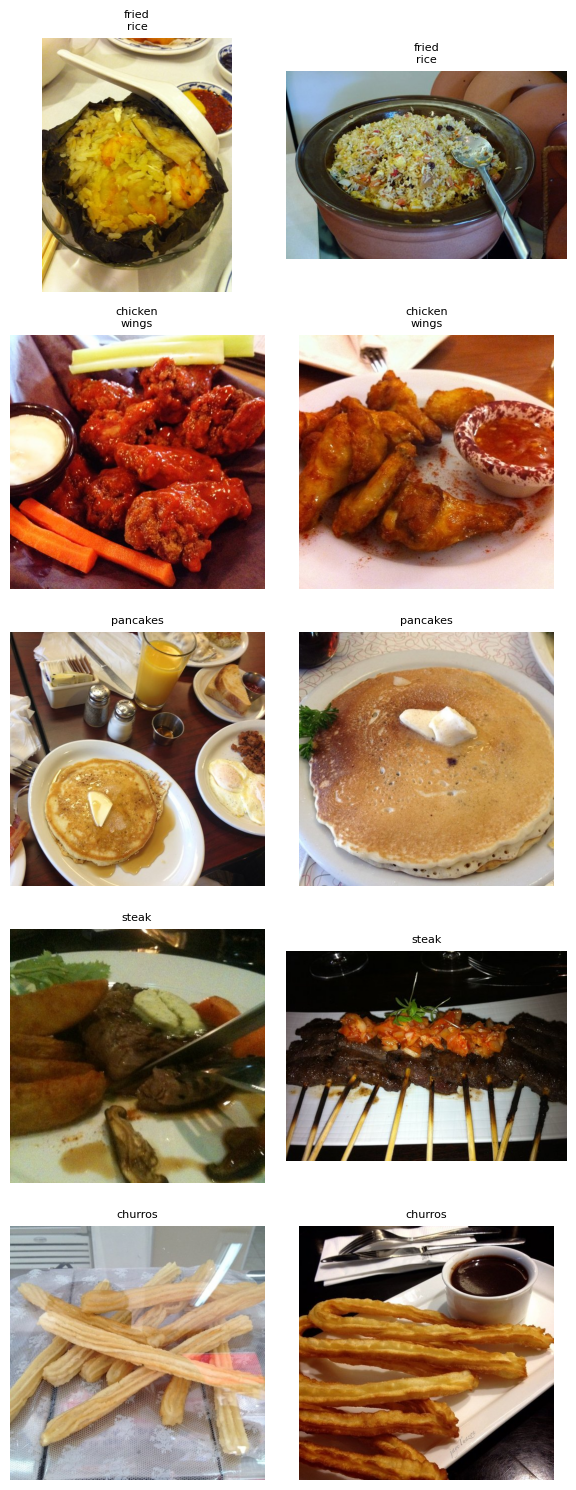

In [9]:
import os
from collections import Counter
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import random
from PIL import Image

# Paths
train_path = "food-20/train"
val_path = "food-20/val"

# Count number of images per class
def count_images_per_class(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            count = len(os.listdir(class_folder))
            class_counts[class_name] = count
    return class_counts

train_counts = count_images_per_class(train_path)
val_counts = count_images_per_class(val_path)

print("Training Images per Class:")
print(train_counts)

print("\nValidation Images per Class:")
print(val_counts)

# Plot a few sample images from random classes
def show_sample_images(folder_path, num_classes=5, images_per_class=2):
    classes = os.listdir(folder_path)
    selected_classes = random.sample(classes, num_classes)
    
    plt.figure(figsize=(images_per_class * 3, num_classes * 3))
    
    img_index = 1
    for class_name in selected_classes:
        class_folder = os.path.join(folder_path, class_name)
        image_files = random.sample(os.listdir(class_folder), images_per_class)
        for img_file in image_files:
            img_path = os.path.join(class_folder, img_file)
            image = Image.open(img_path)
            plt.subplot(num_classes, images_per_class, img_index)
            plt.imshow(image)
            plt.axis("off")
            plt.title(class_name.replace('_', '\n'), fontsize=8)
            img_index += 1
            
    plt.tight_layout()
    plt.show()

# Visualize
show_sample_images(train_path)

In [11]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Set image size
IMAGE_SIZE = 224

# Define transforms
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Paths to filtered dataset
train_path = "food-20/train"
val_path = "food-20/val"

# Load datasets
train_dataset = ImageFolder(root=train_path, transform=train_transforms)
val_dataset   = ImageFolder(root=val_path, transform=val_test_transforms)

print(f"Classes: {train_dataset.classes}")
print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")

Classes: ['caesar_salad', 'chicken_wings', 'churros', 'donuts', 'falafel', 'french_fries', 'fried_rice', 'grilled_cheese_sandwich', 'guacamole', 'hot_dog', 'ice_cream', 'macaroni_and_cheese', 'pancakes', 'pizza', 'ramen', 'spaghetti_bolognese', 'steak', 'sushi', 'tacos', 'waffles']
Train size: 15000
Validation size: 5000


Train Class Distribution:
caesar_salad: 750
chicken_wings: 750
churros: 750
donuts: 750
falafel: 750
french_fries: 750
fried_rice: 750
grilled_cheese_sandwich: 750
guacamole: 750
hot_dog: 750
ice_cream: 750
macaroni_and_cheese: 750
pancakes: 750
pizza: 750
ramen: 750
spaghetti_bolognese: 750
steak: 750
sushi: 750
tacos: 750
waffles: 750

Validation Class Distribution:
caesar_salad: 250
chicken_wings: 250
churros: 250
donuts: 250
falafel: 250
french_fries: 250
fried_rice: 250
grilled_cheese_sandwich: 250
guacamole: 250
hot_dog: 250
ice_cream: 250
macaroni_and_cheese: 250
pancakes: 250
pizza: 250
ramen: 250
spaghetti_bolognese: 250
steak: 250
sushi: 250
tacos: 250
waffles: 250


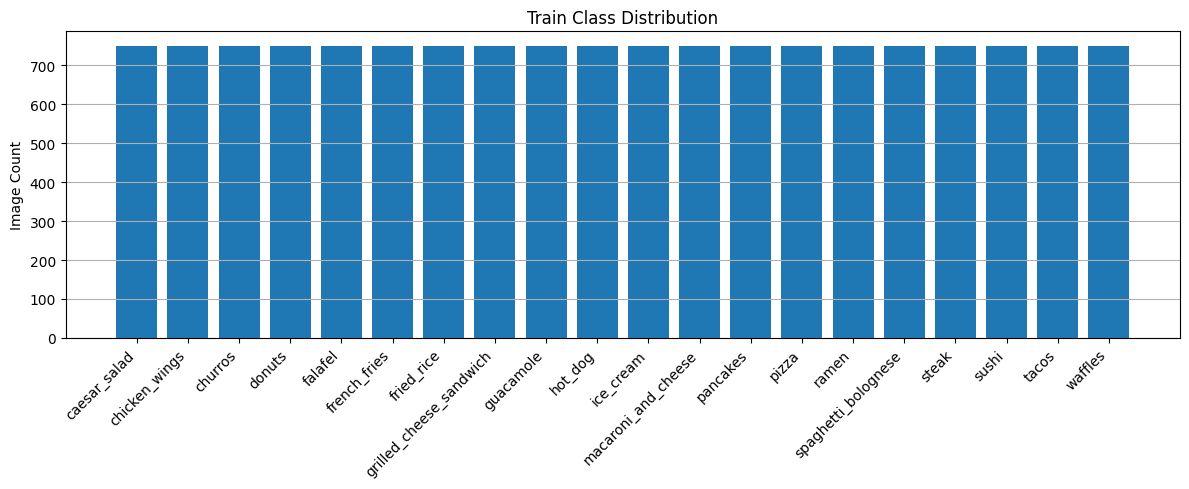

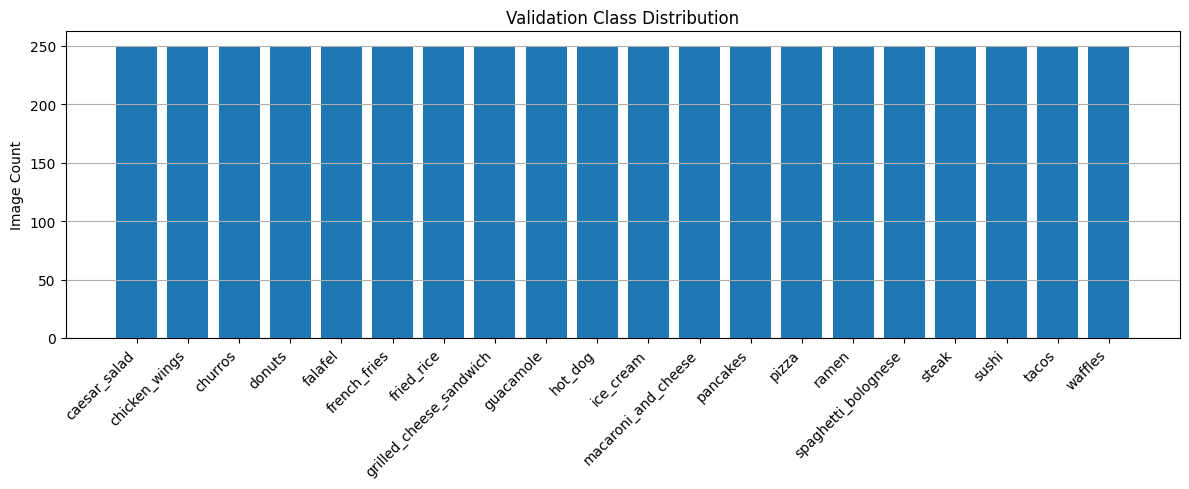

In [12]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Set your paths
train_path = "food-20/train"
val_path = "food-20/val"

def count_images_in_folders(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            num_images = len(os.listdir(class_dir))
            class_counts[class_name] = num_images
    return class_counts

# Count images
train_counts = count_images_in_folders(train_path)
val_counts = count_images_in_folders(val_path)

print("Train Class Distribution:")
for k, v in train_counts.items():
    print(f"{k}: {v}")

print("\nValidation Class Distribution:")
for k, v in val_counts.items():
    print(f"{k}: {v}")

# Plot class distribution
def plot_distribution(class_counts, title):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(12, 5))
    plt.bar(classes, counts)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Image Count")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_distribution(train_counts, "Train Class Distribution")
plot_distribution(val_counts, "Validation Class Distribution")

In [13]:
from PIL import Image
import os

# Paths to check
folders_to_check = ["food-20/train", "food-20/val"]

corrupted_images = []

for folder in folders_to_check:
    print(f"\nChecking folder: {folder}")
    for class_name in os.listdir(folder):
        class_dir = os.path.join(folder, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                try:
                    with Image.open(img_path) as img:
                        # Check mode and size
                        if img.mode != "RGB" or img.size[0] == 0 or img.size[1] == 0:
                            corrupted_images.append(img_path)
                except Exception as e:
                    corrupted_images.append(img_path)

print(f"\nTotal corrupted/unreadable images found: {len(corrupted_images)}")

# Optionally print them
if corrupted_images:
    print("\nList of corrupted/unexpected images:")
    for img in corrupted_images:
        print(img)


Checking folder: food-20/train

Checking folder: food-20/val

Total corrupted/unreadable images found: 1

List of corrupted/unexpected images:
food-20/train\steak\1340977.jpg


In [14]:
import os

# Path to the corrupted image
corrupt_path = "food-20/train/steak/1340977.jpg"

# Delete if exists
if os.path.exists(corrupt_path):
    os.remove(corrupt_path)
    print(f"Deleted: {corrupt_path}")
else:
    print("File already deleted or not found.")

Deleted: food-20/train/steak/1340977.jpg


In [15]:
import os
from collections import defaultdict

def count_images_per_class(base_dir):
    class_counts = defaultdict(int)

    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len([
                img for img in os.listdir(class_path)
                if img.endswith(".jpg")
            ])
    
    return dict(sorted(class_counts.items()))

# Set paths
train_dir = "food-20/train"
val_dir   = "food-20/val"

# Count images
train_counts = count_images_per_class(train_dir)
val_counts   = count_images_per_class(val_dir)

# Display results
print("Train Set Image Counts:")
for cls, count in train_counts.items():
    print(f"{cls:25}: {count}")

print("\nValidation Set Image Counts:")
for cls, count in val_counts.items():
    print(f"{cls:25}: {count}")

Train Set Image Counts:
caesar_salad             : 750
chicken_wings            : 750
churros                  : 750
donuts                   : 750
falafel                  : 750
french_fries             : 750
fried_rice               : 750
grilled_cheese_sandwich  : 750
guacamole                : 750
hot_dog                  : 750
ice_cream                : 750
macaroni_and_cheese      : 750
pancakes                 : 750
pizza                    : 750
ramen                    : 750
spaghetti_bolognese      : 750
steak                    : 749
sushi                    : 750
tacos                    : 750
waffles                  : 750

Validation Set Image Counts:
caesar_salad             : 250
chicken_wings            : 250
churros                  : 250
donuts                   : 250
falafel                  : 250
french_fries             : 250
fried_rice               : 250
grilled_cheese_sandwich  : 250
guacamole                : 250
hot_dog                  : 250
ice_cream       

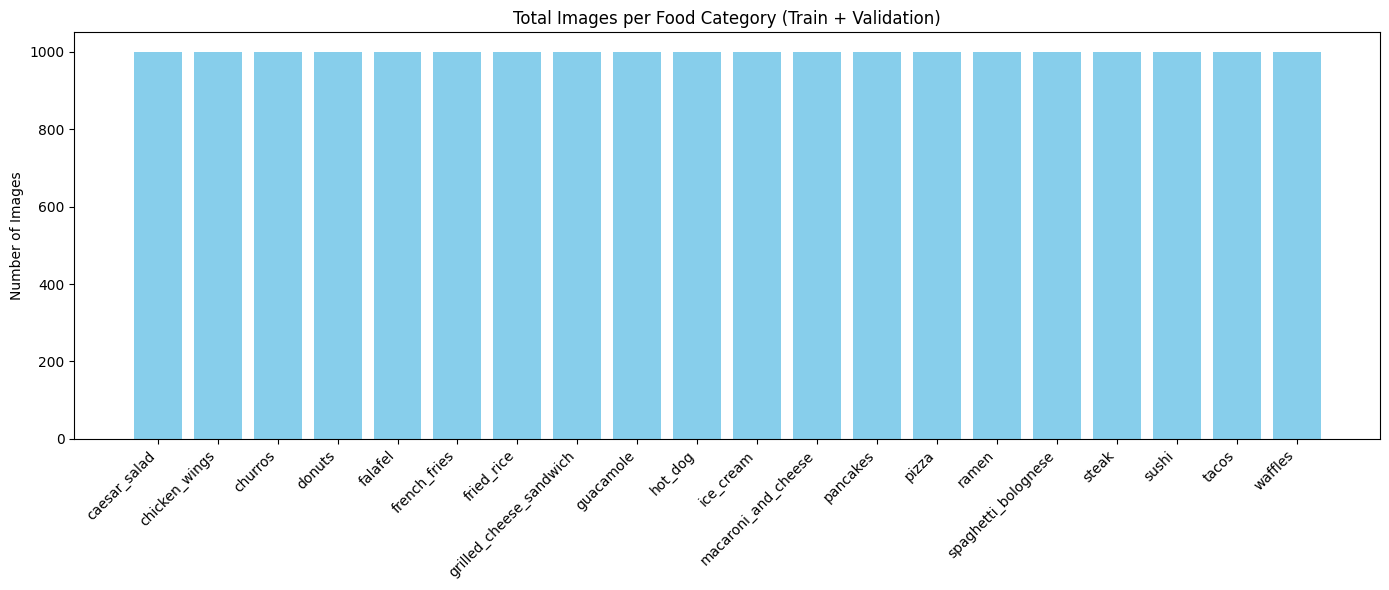

In [16]:
import matplotlib.pyplot as plt

# Merge train and val counts
total_counts = {cls: train_counts.get(cls, 0) + val_counts.get(cls, 0) for cls in train_counts}

# Sort for consistent plotting
sorted_classes = sorted(total_counts.keys())
sorted_counts = [total_counts[cls] for cls in sorted_classes]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(sorted_classes, sorted_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Images")
plt.title("Total Images per Food Category (Train + Validation)")
plt.tight_layout()
plt.show()

In [17]:
from torchvision import transforms

IMAGE_SIZE = 224

# Training transforms with data augmentation
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Validation / Test transforms (no augmentation)
val_test_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [18]:
from torchvision.datasets import ImageFolder

# Paths
train_path = "food-20/train"
val_path   = "food-20/val"

# Datasets
train_dataset = ImageFolder(root=train_path, transform=train_transforms)
val_dataset   = ImageFolder(root=val_path, transform=val_test_transforms)

# Class names
class_names = train_dataset.classes
print("Classes:", class_names)

Classes: ['caesar_salad', 'chicken_wings', 'churros', 'donuts', 'falafel', 'french_fries', 'fried_rice', 'grilled_cheese_sandwich', 'guacamole', 'hot_dog', 'ice_cream', 'macaroni_and_cheese', 'pancakes', 'pizza', 'ramen', 'spaghetti_bolognese', 'steak', 'sushi', 'tacos', 'waffles']


In [19]:
from torch.utils.data import DataLoader

# Hyperparameters
BATCH_SIZE = 32  # you can increase this to 64 if you have enough VRAM

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

print("Train batches:", len(train_loader))
print("Validation batches:", len(val_loader))

Train batches: 469
Validation batches: 157


In [20]:
import torch.nn as nn

class FoodCNN(nn.Module):
    def __init__(self, num_classes=20):
        super(FoodCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Instantiate model
model = FoodCNN(num_classes=len(class_names))
print(model)

FoodCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=20, bias=True)
  )
)


In [21]:
import torch
import torch.optim as optim
import torch.nn as nn

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("Device:", device)

Device: cuda


In [22]:
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()

    epoch_loss = running_loss / len(dataloader)
    epoch_acc = correct / len(dataloader.dataset)
    return epoch_loss, epoch_acc


def validate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

    epoch_loss = running_loss / len(dataloader)
    epoch_acc = correct / len(dataloader.dataset)
    return epoch_loss, epoch_acc

In [23]:
# Number of epochs
num_epochs = 5

# Store results
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = validate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

    scheduler.step()


Epoch 1/5
Train Loss: 3.0187, Accuracy: 0.0478
Val   Loss: 2.9959, Accuracy: 0.0500

Epoch 2/5
Train Loss: 2.9962, Accuracy: 0.0461
Val   Loss: 2.9958, Accuracy: 0.0500

Epoch 3/5
Train Loss: 2.9961, Accuracy: 0.0493
Val   Loss: 2.9957, Accuracy: 0.0500

Epoch 4/5
Train Loss: 2.9961, Accuracy: 0.0458
Val   Loss: 2.9957, Accuracy: 0.0500

Epoch 5/5
Train Loss: 2.9961, Accuracy: 0.0478
Val   Loss: 2.9958, Accuracy: 0.0500


In [24]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Use the same val/test transforms
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Paths
test_path = "food-20/val"  # Using 'val' as test since Food-101 calls it that
test_dataset = ImageFolder(root=test_path, transform=val_test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate
def test_model(model, dataloader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            running_loss += loss.item()

    accuracy = correct / total
    avg_loss = running_loss / len(dataloader)
    return accuracy, avg_loss

# Run evaluation
test_accuracy, test_loss = test_model(model, test_loader, criterion, device)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")



Test Accuracy: 0.0500
Test Loss: 2.9958


In [25]:
import torchvision.models as models
import torch.nn as nn

# Load pretrained ResNet18
resnet18 = models.resnet18(pretrained=True)

# Freeze feature extractor
for param in resnet18.parameters():
    param.requires_grad = False

# Replace final layer for 20-class classification
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 20)

# Move to GPU
resnet18 = resnet18.to(device)

d:\Python\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Python\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [26]:
import torch.optim as optim

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer: only train the classifier layer
optimizer = optim.Adam(resnet18.fc.parameters(), lr=0.001)

In [27]:
# Training function
def train_model(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss, correct_preds, total_preds = 0.0, 0, 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct_preds += (preds == labels).sum().item()
        total_preds += labels.size(0)

    epoch_loss = running_loss / total_preds
    epoch_acc = correct_preds / total_preds
    return epoch_loss, epoch_acc

# Validation function
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    running_loss, correct_preds, total_preds = 0.0, 0, 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct_preds += (preds == labels).sum().item()
            total_preds += labels.size(0)

    epoch_loss = running_loss / total_preds
    epoch_acc = correct_preds / total_preds
    return epoch_loss, epoch_acc

# Training loop
EPOCHS = 5
for epoch in range(EPOCHS):
    train_loss, train_acc = train_model(resnet18, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate_model(resnet18, val_loader, criterion, device)

    print(f"Epoch {epoch+1}/{EPOCHS}")
    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

Epoch 1/5
Train Loss: 1.9093, Accuracy: 0.4604
Val   Loss: 1.0366, Accuracy: 0.7066
Epoch 2/5
Train Loss: 1.4234, Accuracy: 0.5826
Val   Loss: 0.8488, Accuracy: 0.7474
Epoch 3/5
Train Loss: 1.3346, Accuracy: 0.6064
Val   Loss: 0.8324, Accuracy: 0.7514
Epoch 4/5
Train Loss: 1.3073, Accuracy: 0.6130
Val   Loss: 0.8356, Accuracy: 0.7446
Epoch 5/5
Train Loss: 1.2805, Accuracy: 0.6237
Val   Loss: 0.8013, Accuracy: 0.7494


In [28]:
# Evaluate on test set
test_loss, test_acc = evaluate_model(resnet18, test_loader, criterion, device)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Test Loss: 1.0410
Test Accuracy: 0.6858


In [29]:
from torchvision.models import resnet18, ResNet18_Weights
from torch import nn, optim
from torch.optim.lr_scheduler import StepLR

# Load pretrained ResNet18
model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Modify final fully connected layer
num_classes = 20
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move to device
model = model.to(device)

# Unfreeze all layers
for param in model.parameters():
    param.requires_grad = True

# Set differential learning rates
params_to_update = [
    {"params": model.fc.parameters(), "lr": 1e-3},               # Head
    {"params": model.layer4.parameters(), "lr": 1e-4},           # Deep layers
    {"params": model.layer3.parameters(), "lr": 1e-4},           # Mid layers
    {"params": model.layer2.parameters(), "lr": 1e-4},           # Shallow layers
    {"params": model.layer1.parameters(), "lr": 1e-4},
    {"params": model.conv1.parameters(), "lr": 1e-4},
    {"params": model.bn1.parameters(), "lr": 1e-4}
]

optimizer = optim.Adam(params_to_update)
criterion = nn.CrossEntropyLoss()

# Learning rate scheduler
scheduler = StepLR(optimizer, step_size=3, gamma=0.5)

# Training loop (5 more epochs)
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=5):
    for epoch in range(epochs):
        model.train()
        train_loss, correct, total = 0, 0, 0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(targets).sum().item()
            total += targets.size(0)

        train_acc = correct / total
        train_loss /= total

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_correct += predicted.eq(targets).sum().item()
                val_total += targets.size(0)

        val_acc = val_correct / val_total
        val_loss /= val_total
        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
        print(f"Val   Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}\n")

    return model

# Train the model
model = train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=5)

Epoch 1/5
Train Loss: 1.2854, Accuracy: 0.6266
Val   Loss: 0.5407, Accuracy: 0.8400

Epoch 2/5
Train Loss: 0.9132, Accuracy: 0.7320
Val   Loss: 0.5124, Accuracy: 0.8456

Epoch 3/5
Train Loss: 0.8096, Accuracy: 0.7599
Val   Loss: 0.4261, Accuracy: 0.8714

Epoch 4/5
Train Loss: 0.6448, Accuracy: 0.8117
Val   Loss: 0.3886, Accuracy: 0.8824

Epoch 5/5
Train Loss: 0.5793, Accuracy: 0.8287
Val   Loss: 0.3535, Accuracy: 0.8934



In [30]:
# Evaluate on test set
test_loss, test_acc = evaluate_model(model, test_loader, criterion, device)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Test Loss: 0.4602
Test Accuracy: 0.8636


In [31]:
# Class label to friendly name and description
food_descriptions = {
    'pizza': ("Pizza", "A baked dish with dough base, tomato sauce, cheese, and various toppings."),
    'sushi': ("Sushi", "A Japanese dish with vinegared rice and seafood or vegetables."),
    'waffles': ("Waffles", "A crisp, sweet breakfast dish made from batter cooked in a waffle iron."),
    'fried_rice': ("Fried Rice", "Stir-fried rice with vegetables, eggs, and sometimes meat."),
    'ice_cream': ("Ice Cream", "A frozen dessert made from dairy and flavored with sweeteners."),
    'steak': ("Steak", "A thick slice of beef cooked by grilling, frying, or broiling."),
    'spaghetti_bolognese': ("Spaghetti Bolognese", "Spaghetti pasta with a meat-based tomato sauce."),
    'guacamole': ("Guacamole", "A creamy Mexican dip made from mashed avocados."),
    'ramen': ("Ramen", "A Japanese noodle soup with meat, eggs, and vegetables."),
    'grilled_cheese_sandwich': ("Grilled Cheese Sandwich", "A sandwich with melted cheese between toasted bread."),
    'churros': ("Churros", "Fried dough pastries rolled in sugar, often served with chocolate."),
    'macaroni_and_cheese': ("Mac & Cheese", "Macaroni pasta in a creamy cheese sauce."),
    'hot_dog': ("Hot Dog", "A grilled or steamed sausage served in a sliced bun."),
    'falafel': ("Falafel", "Deep-fried balls made from ground chickpeas or fava beans."),
    'chicken_wings': ("Chicken Wings", "Fried or baked chicken wings often served with sauces."),
    'french_fries': ("French Fries", "Thin slices of deep-fried potatoes, often salted."),
    'donuts': ("Donuts", "Sweet fried dough rings, often glazed or filled."),
    'pancakes': ("Pancakes", "Flat, round cakes made from batter and cooked on a griddle."),
    'tacos': ("Tacos", "Mexican dish with folded tortillas filled with meat, cheese, or veggies."),
    'caesar_salad': ("Caesar Salad", "A salad with romaine, croutons, parmesan, and Caesar dressing.")
}

In [32]:
from torchvision import transforms
from PIL import Image
import torch
import matplotlib.pyplot as plt

def predict_image(image_path, model, class_names, description_dict, device):
    # Set model to eval mode
    model.eval()

    # Define the same transformation as validation set
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],  # standard ImageNet means
            std=[0.229, 0.224, 0.225]    # standard ImageNet stds
        )
    ])

    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Run prediction
    with torch.no_grad():
        outputs = model(input_tensor)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        top_prob, top_class = probs.topk(1, dim=1)

    predicted_label = class_names[top_class.item()]
    friendly_name, description = description_dict[predicted_label]

    # Display image and prediction
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{friendly_name} ({top_prob.item()*100:.2f}%)", fontsize=14)
    plt.show()

    # Print description
    print(f"Prediction: {friendly_name}")
    print(f"Confidence: {top_prob.item()*100:.2f}%")
    print(f"Description: {description}")

In [33]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def predict_local_image(image_path, model, class_names, food_descriptions, device):
    # Image transformation (same as during training)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
    
    # Load and transform image
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Model prediction
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        probs = torch.softmax(output, dim=1)
        conf, predicted_class = torch.max(probs, 1)

    predicted_label = class_names[predicted_class.item()]
    confidence = conf.item() * 100
    description = food_descriptions.get(predicted_label, "No description available.")

    # Print and show results
    print(f"\n Predicted Class     : {predicted_label}")
    print(f"Confidence          : {confidence:.2f}%")
    print(f"Food Description    : {description}")

    # Show image (optional)
    plt.imshow(image)
    plt.title(predicted_label)
    plt.axis('off')
    plt.show()

Random image path: food-20\val\pizza\3814200.jpg

 Predicted Class     : pizza
Confidence          : 100.00%
Food Description    : ('Pizza', 'A baked dish with dough base, tomato sauce, cheese, and various toppings.')


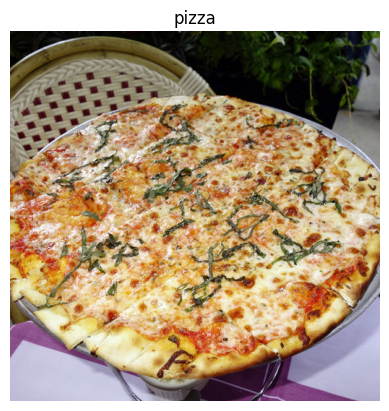

In [34]:
import os
import random

# Pick a random image from a specific class
def get_random_image_path(class_name, split='val'):
    class_folder = os.path.join("food-20", split, class_name)
    image_file = random.choice(os.listdir(class_folder))
    return os.path.join(class_folder, image_file)

# Example: get random pizza image path
sample_path = get_random_image_path("pizza", split="val")
print("Random image path:", sample_path)

# Predict it
predict_local_image(sample_path, model, class_names, food_descriptions, device)

In [35]:
# Save the trained model to a .pth file
import torch
torch.save(model.state_dict(), "best_model.pth")
print("Model saved as best_model.pth")

Model saved as best_model.pth
